<a href="https://colab.research.google.com/github/SahilD95/Credit-Risk-Analysis/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

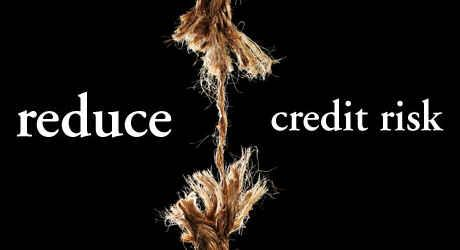

**Business Problem:** Credit risk is the possibility of a loss resulting from a borrower's failure to repay a loan or meet contractual obligations. Traditionally, it refers to the risk that a lender may not receive the owed principal and interest, which results in an interruption of cash flows and increased costs for collection.

Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visulaization liberary
import seaborn as sns #advance visualization liberary
import sklearn.metrics as metrics #logistic regression


import warnings
warnings.filterwarnings('ignore')

Importing drive 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Default = df = pd.read_csv("/content/drive/MyDrive/credit_risk.csv")
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
df.shape #rows,columns

(10000, 4)

**EDA** 

**Univariate Analysis** 

BOX PLOT to check 5 point summary

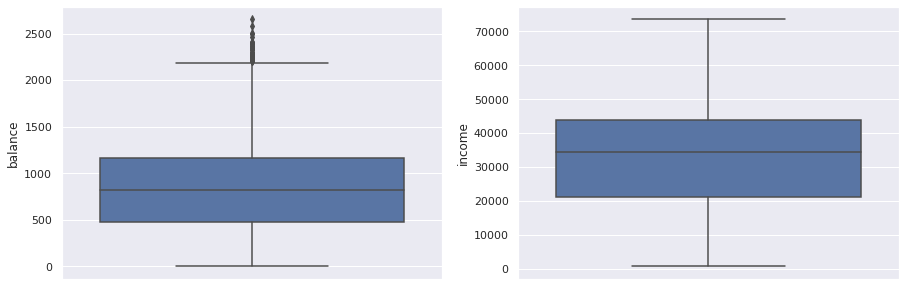

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(y = df['balance'])

plt.subplot(1,2,2)
sns.boxplot(y = df['income'])
plt.show()

COUNTPLOT

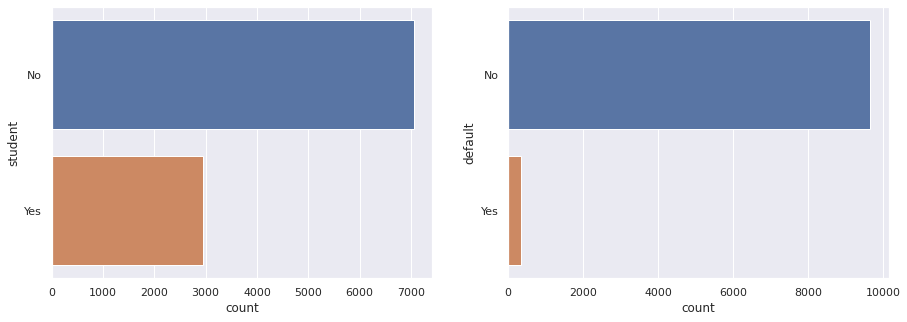

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(y = df['student'])

plt.subplot(1,2,2)
sns.countplot(y = df['default'])
plt.show()

In [ ]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

Normalizating to see values in percentage

In [ ]:
df['student'].value_counts(normalize = True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [ ]:
df['default'].value_counts(normalize = True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

**Bivaraint Analysis** 

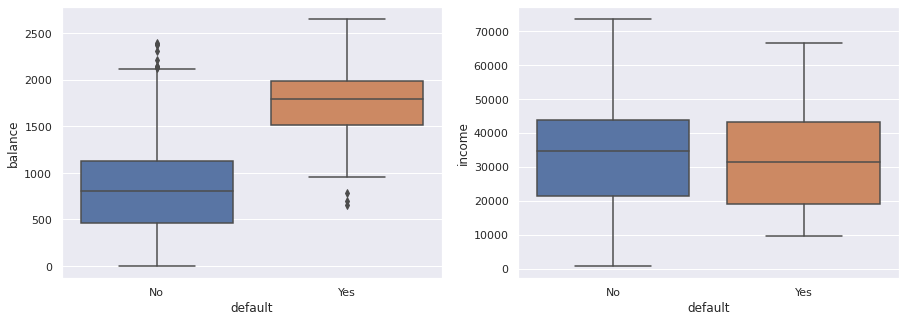

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df['default'], df['balance'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['income'])
plt.show()

Cross Tabulation between two catagoricals columns

In [ ]:
pd.crosstab(df['student'],df['default'], normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


Heat Map for numerical columns

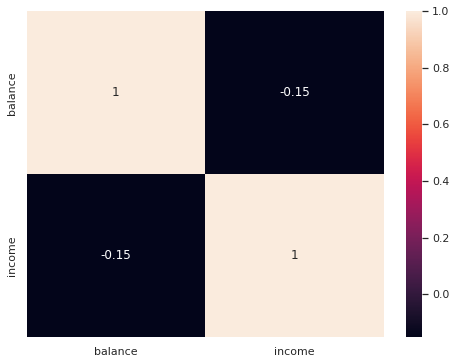

In [ ]:
sns.heatmap(df[['balance', 'income']].corr(), annot = True)

Conclusion: Not much corealtion between balance and income.

To check null values

In [ ]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

Checking the values of outliers

In [ ]:
Q1, Q3 = df['balance'].quantile([0.25,0.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

Upper Limit

In [ ]:
UL

2193.174308607817

To check values which are above Upper Limit

In [ ]:
df1 = Default[Default['balance']>UL]

In [ ]:
df1

,default,student,balance,income
173,Yes,Yes,2205.799521,14271.492253
1136,Yes,No,2499.016750,51504.293960
1160,Yes,Yes,2502.684931,14947.519752
1359,Yes,No,2220.966201,40725.096207
1502,Yes,Yes,2332.878254,11770.234124
1609,Yes,Yes,2269.946966,18021.105948
2096,Yes,Yes,2261.848162,20030.165119
2140,No,Yes,2308.893236,19110.266412
2929,Yes,Yes,2387.314867,28296.914718
3162,Yes,Yes,2415.316994,17429.503375


In [ ]:
df1['default'].count()

31

Checking defaulters in outliers

In [ ]:
df1['default'].value_counts(normalize = True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [ ]:
df1['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

We cannot remove outliers as there are 83% of defaulters are there

So, I am putting outliers equal to maximum values and storing values in balance columns

In [ ]:
df['balance'] = np.where(df['balance'] > UL, UL, df['balance'] )

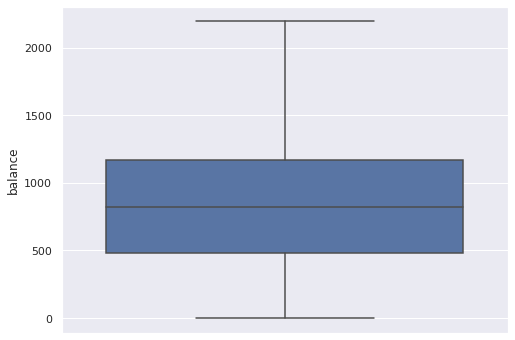

In [ ]:
sns.boxplot(y = df['balance'])
plt.show()

**Dummy Encoding** 

In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


Renaming Columns

In [ ]:
df.columns = ['balance', 'income','default','student']

In [ ]:
df.head()

,balance,income,default,student
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


Splitting into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split

**X = Independent Varaible**  i.e (balance,income,student)

**Y = Dependent Varaible**  (i.e Default(Whether a person is defaulter or not)

In [ ]:
X = df.drop('default' , axis = 1)
y = df['default']

Setting 30% as test size, using startifies because data is imbalance, so it will do startified sampling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21, stratify = y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [ ]:
print("Train Set")
print(y_train.value_counts(normalize=True).round(2))
print("Test Set")
print(y_test.value_counts(normalize=True).round(2))

Train Set
0    0.97
1    0.03
Name: default, dtype: float64
Test Set
0    0.97
1    0.03
Name: default, dtype: float64


**SMOTE** 

As target variable is imbalace, so we use SMOTE here which means Synthetic Minority Oversampling Technique, putting 0.75 as sampling *strategy*

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

**Logistic Regression** 


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
 lr = LogisticRegression()

In [ ]:
lr.fit(X_res,y_res)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2589,  311],
       [  25,   75]])

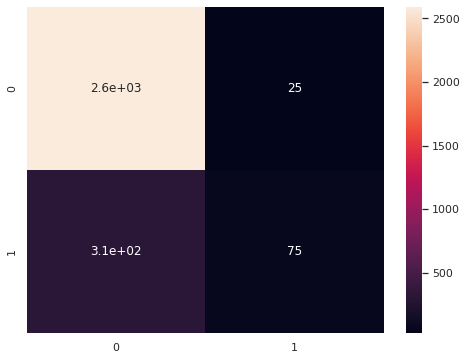

In [ ]:
cm1=confusion_matrix(y_pred,y_test)
sns.heatmap(cm1,annot=True)

In [ ]:
True_Positive = TP_LR = 75
False_Positive = FP = 311
False_Negative = FN = 25
True_Negative = TN = 2589

In [ ]:
Accuracy_LR = Acc = (TP_LR+TN_LR)/(TP_LR+FP_LR+FN_LR+TN_LR)
Accuracy_LR

0.888

In [ ]:
Accuracy_LR*100

88.8

Accuracy of our model is 88.8 percent

In [ ]:
Precision_LR= TP_LR/(TP_LR+FP_LR)
Precision_LR*100

19.4300518134715

In [ ]:
Recall_LR = TP_LR/(TP_LR+FN_LR)
Recall_LR*100

75.0

In [ ]:
F1_Score_LR = 2*Precision_LR*Recall_LR/(Precision_LR+Recall_LR)
F1_Score_LR*100

30.864197530864196

**Random Forest** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc

RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2865,   35],
       [  70,   30]])

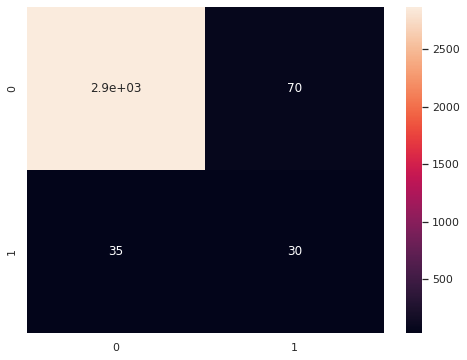

In [ ]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [ ]:
TN_RF = 2865
FP_RF = 70
FN_RF = 35
TP_RF = 30

In [ ]:
Accuracy_RF = Acc_RF = (TP_RF+TN_RF)/(TP_RF+FP_RF+FN_RF+TN_RF)
Accuracy_RF

0.965

In [ ]:
Accuracy_RF*100

96.5

In [ ]:
Precision_RF = Pre_RF = TP_RF/(TP_RF+FP_RF)
Precision_RF*100

30.0

In [ ]:
Recall_RF = Rec_RF = TP_RF/(TP_RF+FN_RF)
Recall_RF*100

46.15384615384615

In [ ]:
F1_Score_RF = 2*Precision_RF*Recall_RF/(Precision_RF+Recall_RF)
F1_Score_RF*100

36.36363636363637

**Decision Tree** 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt= DecisionTreeClassifier(max_depth=5)
dt

DecisionTreeClassifier(max_depth=5)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred=dt.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2875,   25],
       [  75,   25]])

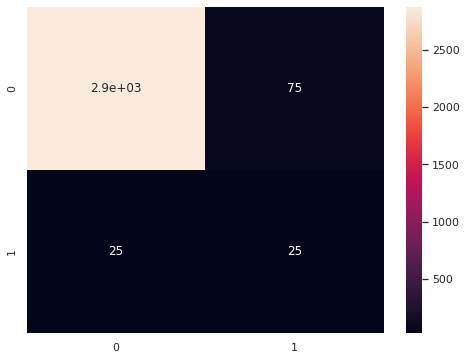

In [ ]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [ ]:
TN_DT = 2875
FP_DT = 75
FN_DT = 25
TP_DT = 25

In [ ]:
Accuracy_DT = Acc_DT = (TP_DT+TN_DT)/(TP_DT+FP_DT+FN_DT+TN_DT)
Accuracy_DT*100

96.66666666666667

In [ ]:
Recall_DT = Rec_DT = TP_DT/(TP_DT+FN_DT)
Recall_DT*100

50.0

In [ ]:
Precision_DT = Pre_DT = TP_DT/(TP_DT+FP_DT)
Precision_DT*100

25.0

In [ ]:
F1_Score_DT = 2*Precision_DT*Recall_DT/(Precision_DT+Recall_DT)
F1_Score_DT*100

33.33333333333333

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN

KNeighborsClassifier(n_neighbors=7)

In [ ]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_pred=KNN.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[2896,    4],
       [  88,   12]])

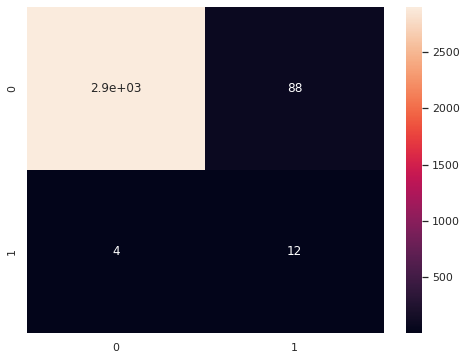

In [ ]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [ ]:
TN_KNN = 2896
FP_KNN = 88
FN_KNN = 4
TP_KNN = 12

In [ ]:
Accuracy_KNN = Acc_KNN = (TP_KNN+TN_KNN)/(TP_KNN+FP_KNN+FN_KNN+TN_KNN)
Accuracy_KNN*100

96.93333333333334

In [ ]:
Recall_KNN = Rec_KNN = TP_KNN/(TP_KNN+FN_KNN)
Recall_KNN*100

75.0

In [ ]:
Precision_KNN = TP_KNN/(TP_KNN+FP_KNN)
Precision_KNN*100

12.0

In [ ]:
F1_Score_KNN = 2*Precision_KNN*Recall_KNN/(Precision_KNN+Recall_KNN)
F1_Score_KNN*100

20.689655172413794

In [ ]:
data = [['LR', 88.8,30.86], ['RF',96.5, 36.36], ['DT', 96.66,33.33],['KNN',96.93,20.68]]
  
Matrix = pd.DataFrame(data, columns=['Model', 'Acuuracy','F1 Score'])
Matrix

,Model,Acuuracy,F1 Score
0,LR,88.80,30.86
1,RF,96.50,36.36
2,DT,96.66,33.33
3,KNN,96.93,20.68


**Conclusion:** Random Forest is giving us high accuracy and f1 score compare to other models. Here, f1 score is below 50% so we can use other technique like Hyperparameter tuning, StandardScaler to improve it. As of now I am still learning those techniques.